In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import math

#プロット用です
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# 機械学習用です。
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# もう一つ、性能の評価用に
from sklearn import metrics

# エラーが出たら、セットアップをお願いします。
import statsmodels.api as sm

In [2]:
df = sm.datasets.fair.load_pandas().data

In [3]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [4]:
def affair_check(x):
    if x!=0:
        return 1
    else:
        return 0

df['Had_Affair']=df['affairs'].apply(affair_check)

In [5]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [6]:
group=df.groupby('Had_Affair').mean()

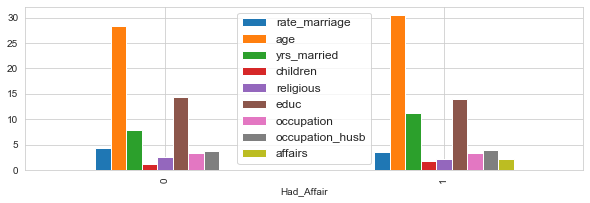

In [7]:
group.plot.bar(figsize=(10,3),fontsize=10)
plt.legend(fontsize=12)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000223003E96C8>,
      dtype=object)

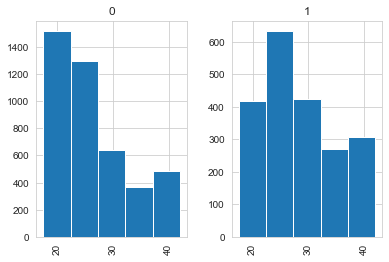

In [8]:
df['age'].hist(bins=5,by=df['Had_Affair'])

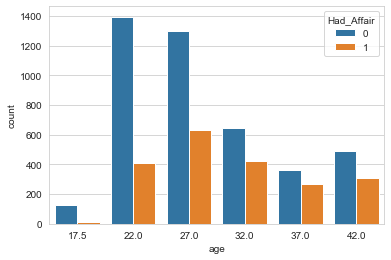

In [9]:
sns.countplot(df['age'], hue=df['Had_Affair'])

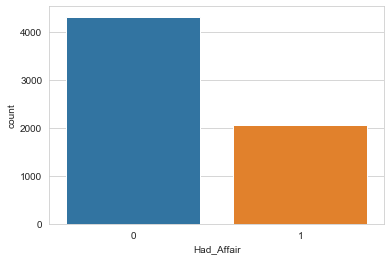

In [10]:
sns.countplot(df['Had_Affair'])

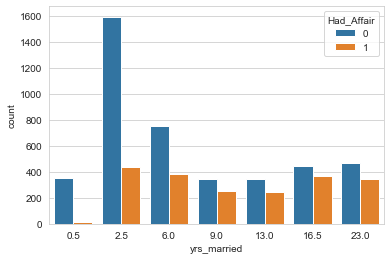

In [11]:
sns.countplot(df['yrs_married'], hue=df['Had_Affair'])

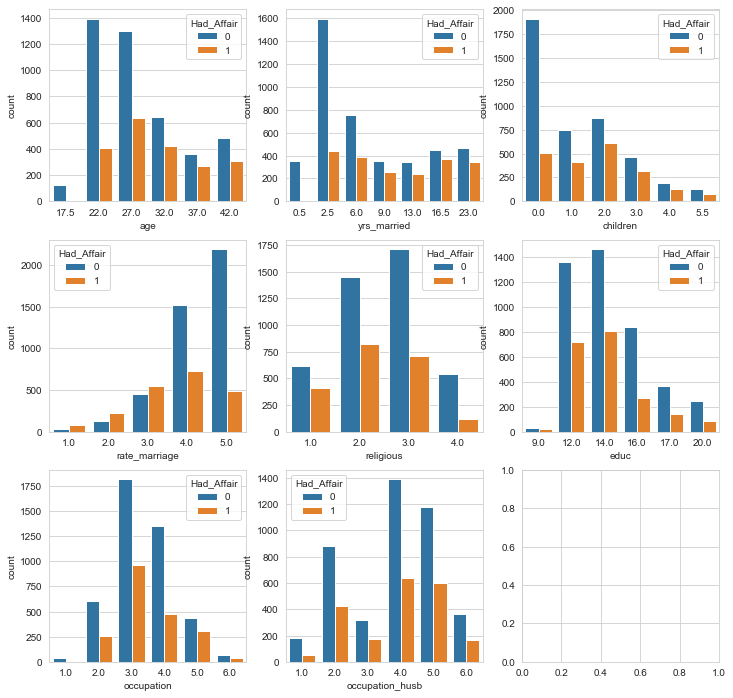

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(12,12))

sns.countplot(df['age'], hue=df['Had_Affair'],ax=axes[0,0])
sns.countplot(df['yrs_married'], hue=df['Had_Affair'],ax=axes[0,1])
sns.countplot(df['children'], hue=df['Had_Affair'],ax=axes[0,2])
sns.countplot(df['rate_marriage'], hue=df['Had_Affair'],ax=axes[1,0])
sns.countplot(df['religious'], hue=df['Had_Affair'],ax=axes[1,1])
sns.countplot(df['educ'], hue=df['Had_Affair'],ax=axes[1,2])
sns.countplot(df['occupation'], hue=df['Had_Affair'],ax=axes[2,0])
sns.countplot(df['occupation_husb'], hue=df['Had_Affair'],ax=axes[2,1])


In [13]:
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']
occ_dummies

,occ1,occ2,occ3,occ4,occ5,occ6
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
6361,0,0,0,1,0,0
6362,0,0,0,0,1,0
6363,0,0,1,0,0,0
6364,0,0,1,0,0,0


In [14]:
occ_dummies

,occ1,occ2,occ3,occ4,occ5,occ6
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
6361,0,0,0,1,0,0
6362,0,0,0,0,1,0
6363,0,0,1,0,0,0
6364,0,0,1,0,0,0


In [15]:
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [16]:
X

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666
...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,0.000000


In [17]:
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [18]:
dummies

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6361,0,0,0,1,0,0,0,0,1,0,0,0
6362,0,0,0,0,1,0,0,0,0,0,1,0
6363,0,0,1,0,0,0,1,0,0,0,0,0
6364,0,0,1,0,0,0,0,0,0,1,0,0


In [19]:
XX = pd.concat([X,dummies],axis= 1)

In [20]:
XX

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,0.000000,0,0,0,1,0,0,0,0,1,0,0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,0.000000,0,0,0,0,1,0,0,0,0,0,1,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,0.000000,0,0,1,0,0,0,1,0,0,0,0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,0.000000,0,0,1,0,0,0,0,0,0,1,0,0


In [21]:
Y = df.Had_Affair

In [22]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, Length: 6366, dtype: int64

In [23]:
XX = XX.drop('occ1',axis=1)

In [24]:
XX = XX.drop('hocc1',axis=1)

In [25]:
XX = XX.drop('affairs',axis=1)

In [26]:
XX

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,0,0,1,0,0,0,1,0,0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,0,0,0,1,0,0,0,0,1,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,0,1,0,0,0,0,0,0,0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,0,1,0,0,0,0,0,1,0,0


In [27]:
Y= Y.values

In [28]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [29]:
model = LogisticRegression()

In [30]:
model.fit(XX,Y)

C:\Users\lllni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
model.score(XX,Y)

0.7258875274897895

In [32]:
X2 = pd.concat([X,dummies],axis= 1)

In [33]:
model1 = LogisticRegression()

In [34]:
model1.fit(X2,Y)

C:\Users\lllni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
model1.score(X2,Y)

0.9787935909519322

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(XX, Y)
model2 = LogisticRegression()
model2.fit(X_train, Y_train)

C:\Users\lllni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
class_predict = model2.predict(X_test)
print(metrics.accuracy_score(Y_test,class_predict))

0.7217336683417085


In [38]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y)
model3 = LogisticRegression()
model3.fit(X2_train, Y2_train)
class_predict2 = model3.predict(X2_test)
print(metrics.accuracy_score(Y2_test,class_predict2))

0.9792713567839196


C:\Users\lllni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
